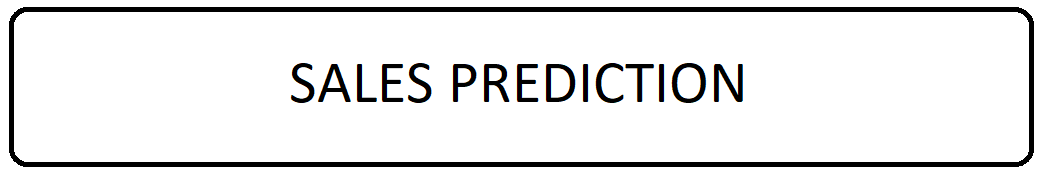

## Importing necessary libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

## Loading dataset

In [90]:
df=pd.read_csv('advertising.csv')

In [91]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Information about dataset

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Check Null Values

In [93]:
df.isnull().sum()/len(df)*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

- No null values

- All are numerical columns no need of encoding

## outliers check

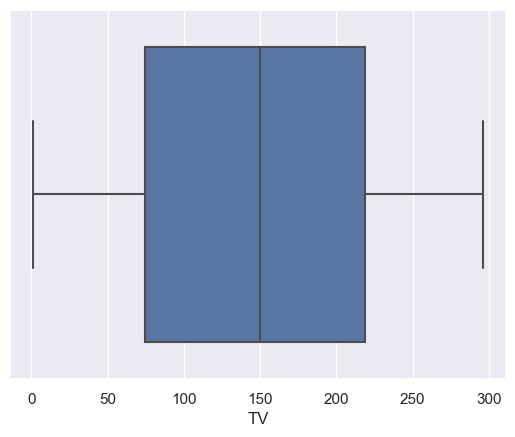

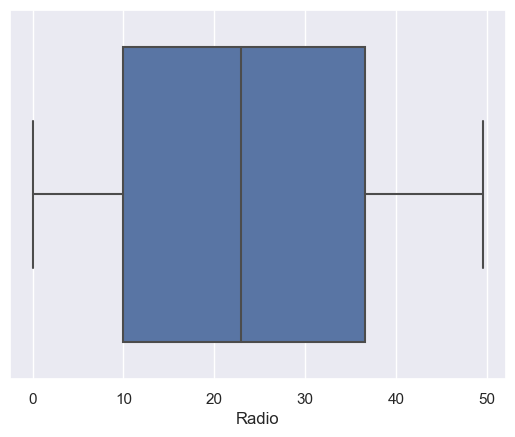

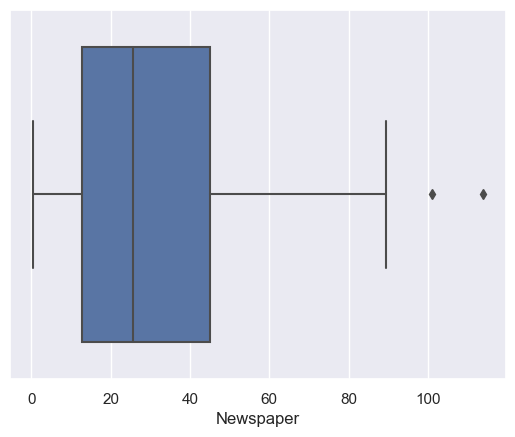

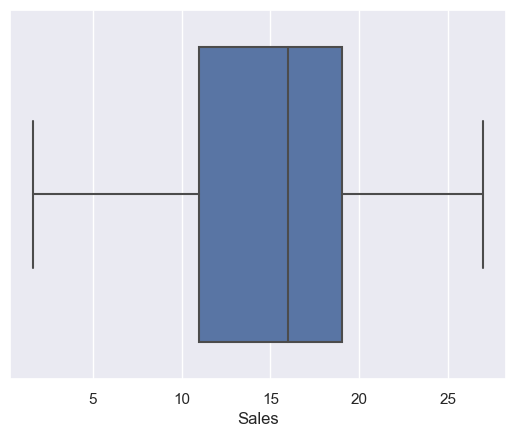

In [95]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

- News paper have outliers but its needed for prediction of sales

## Descriptive analysis

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


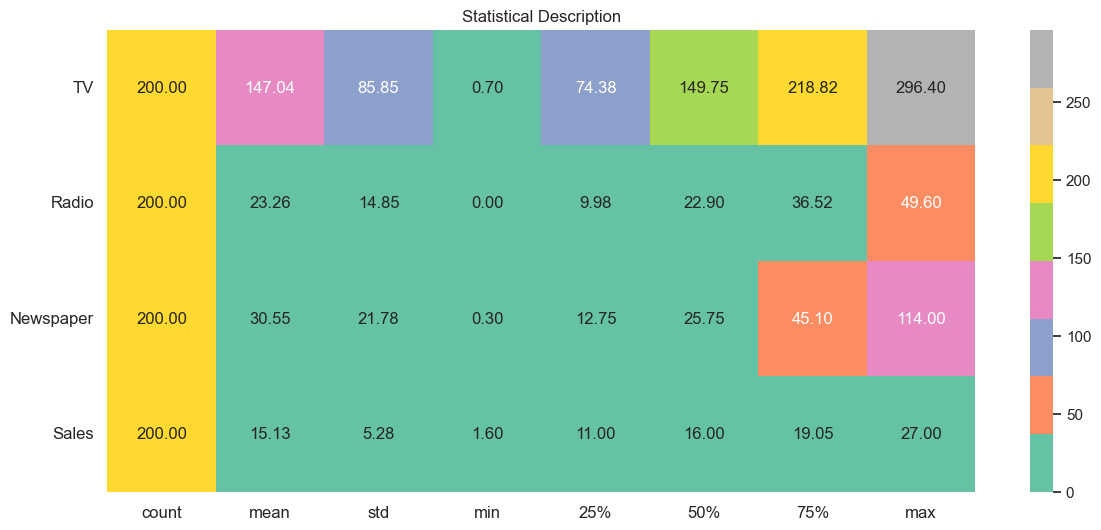

In [121]:
def descriptive_stats(df):
    desc = df.describe().round(2).T
    desc_df = pd.DataFrame(index=df.columns,columns=desc.columns,data=desc) 
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()
descriptive_stats(df)

## split data into idv and dv

In [97]:
x=df.drop('Sales',axis=1)
y=df[['Sales']]

# Feature scaling

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

## HEATMAP

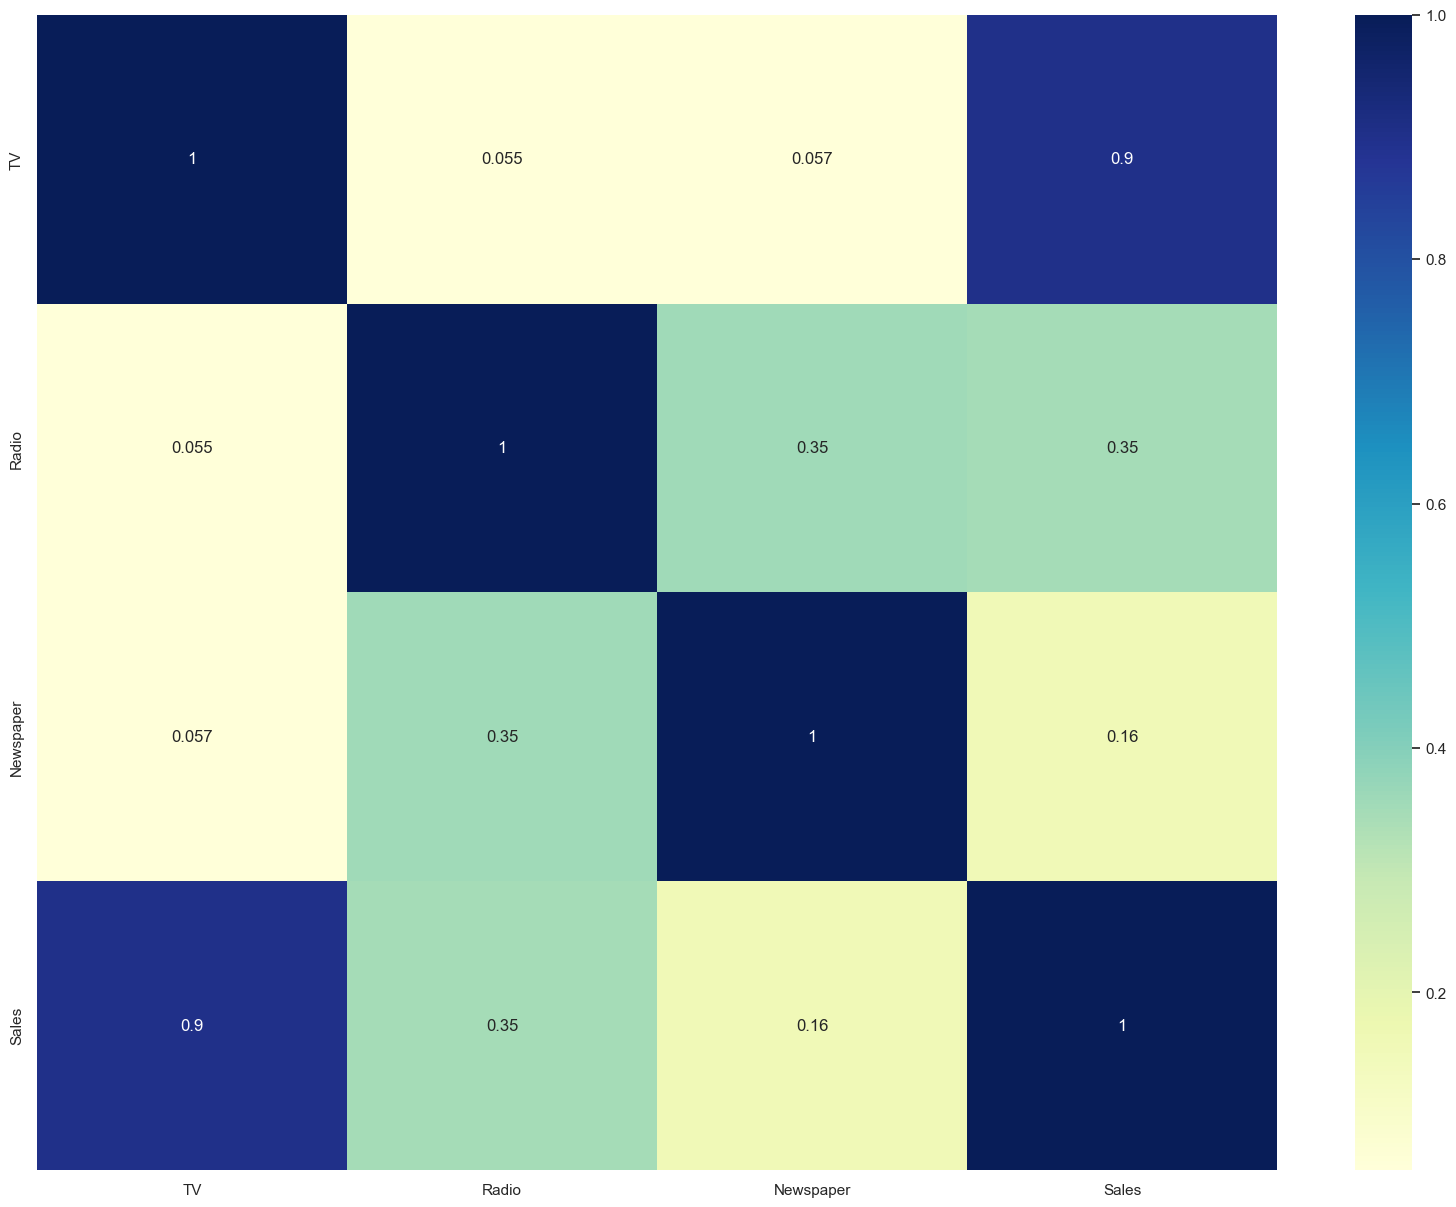

In [119]:
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

## BIVARIATE ANALYSIS

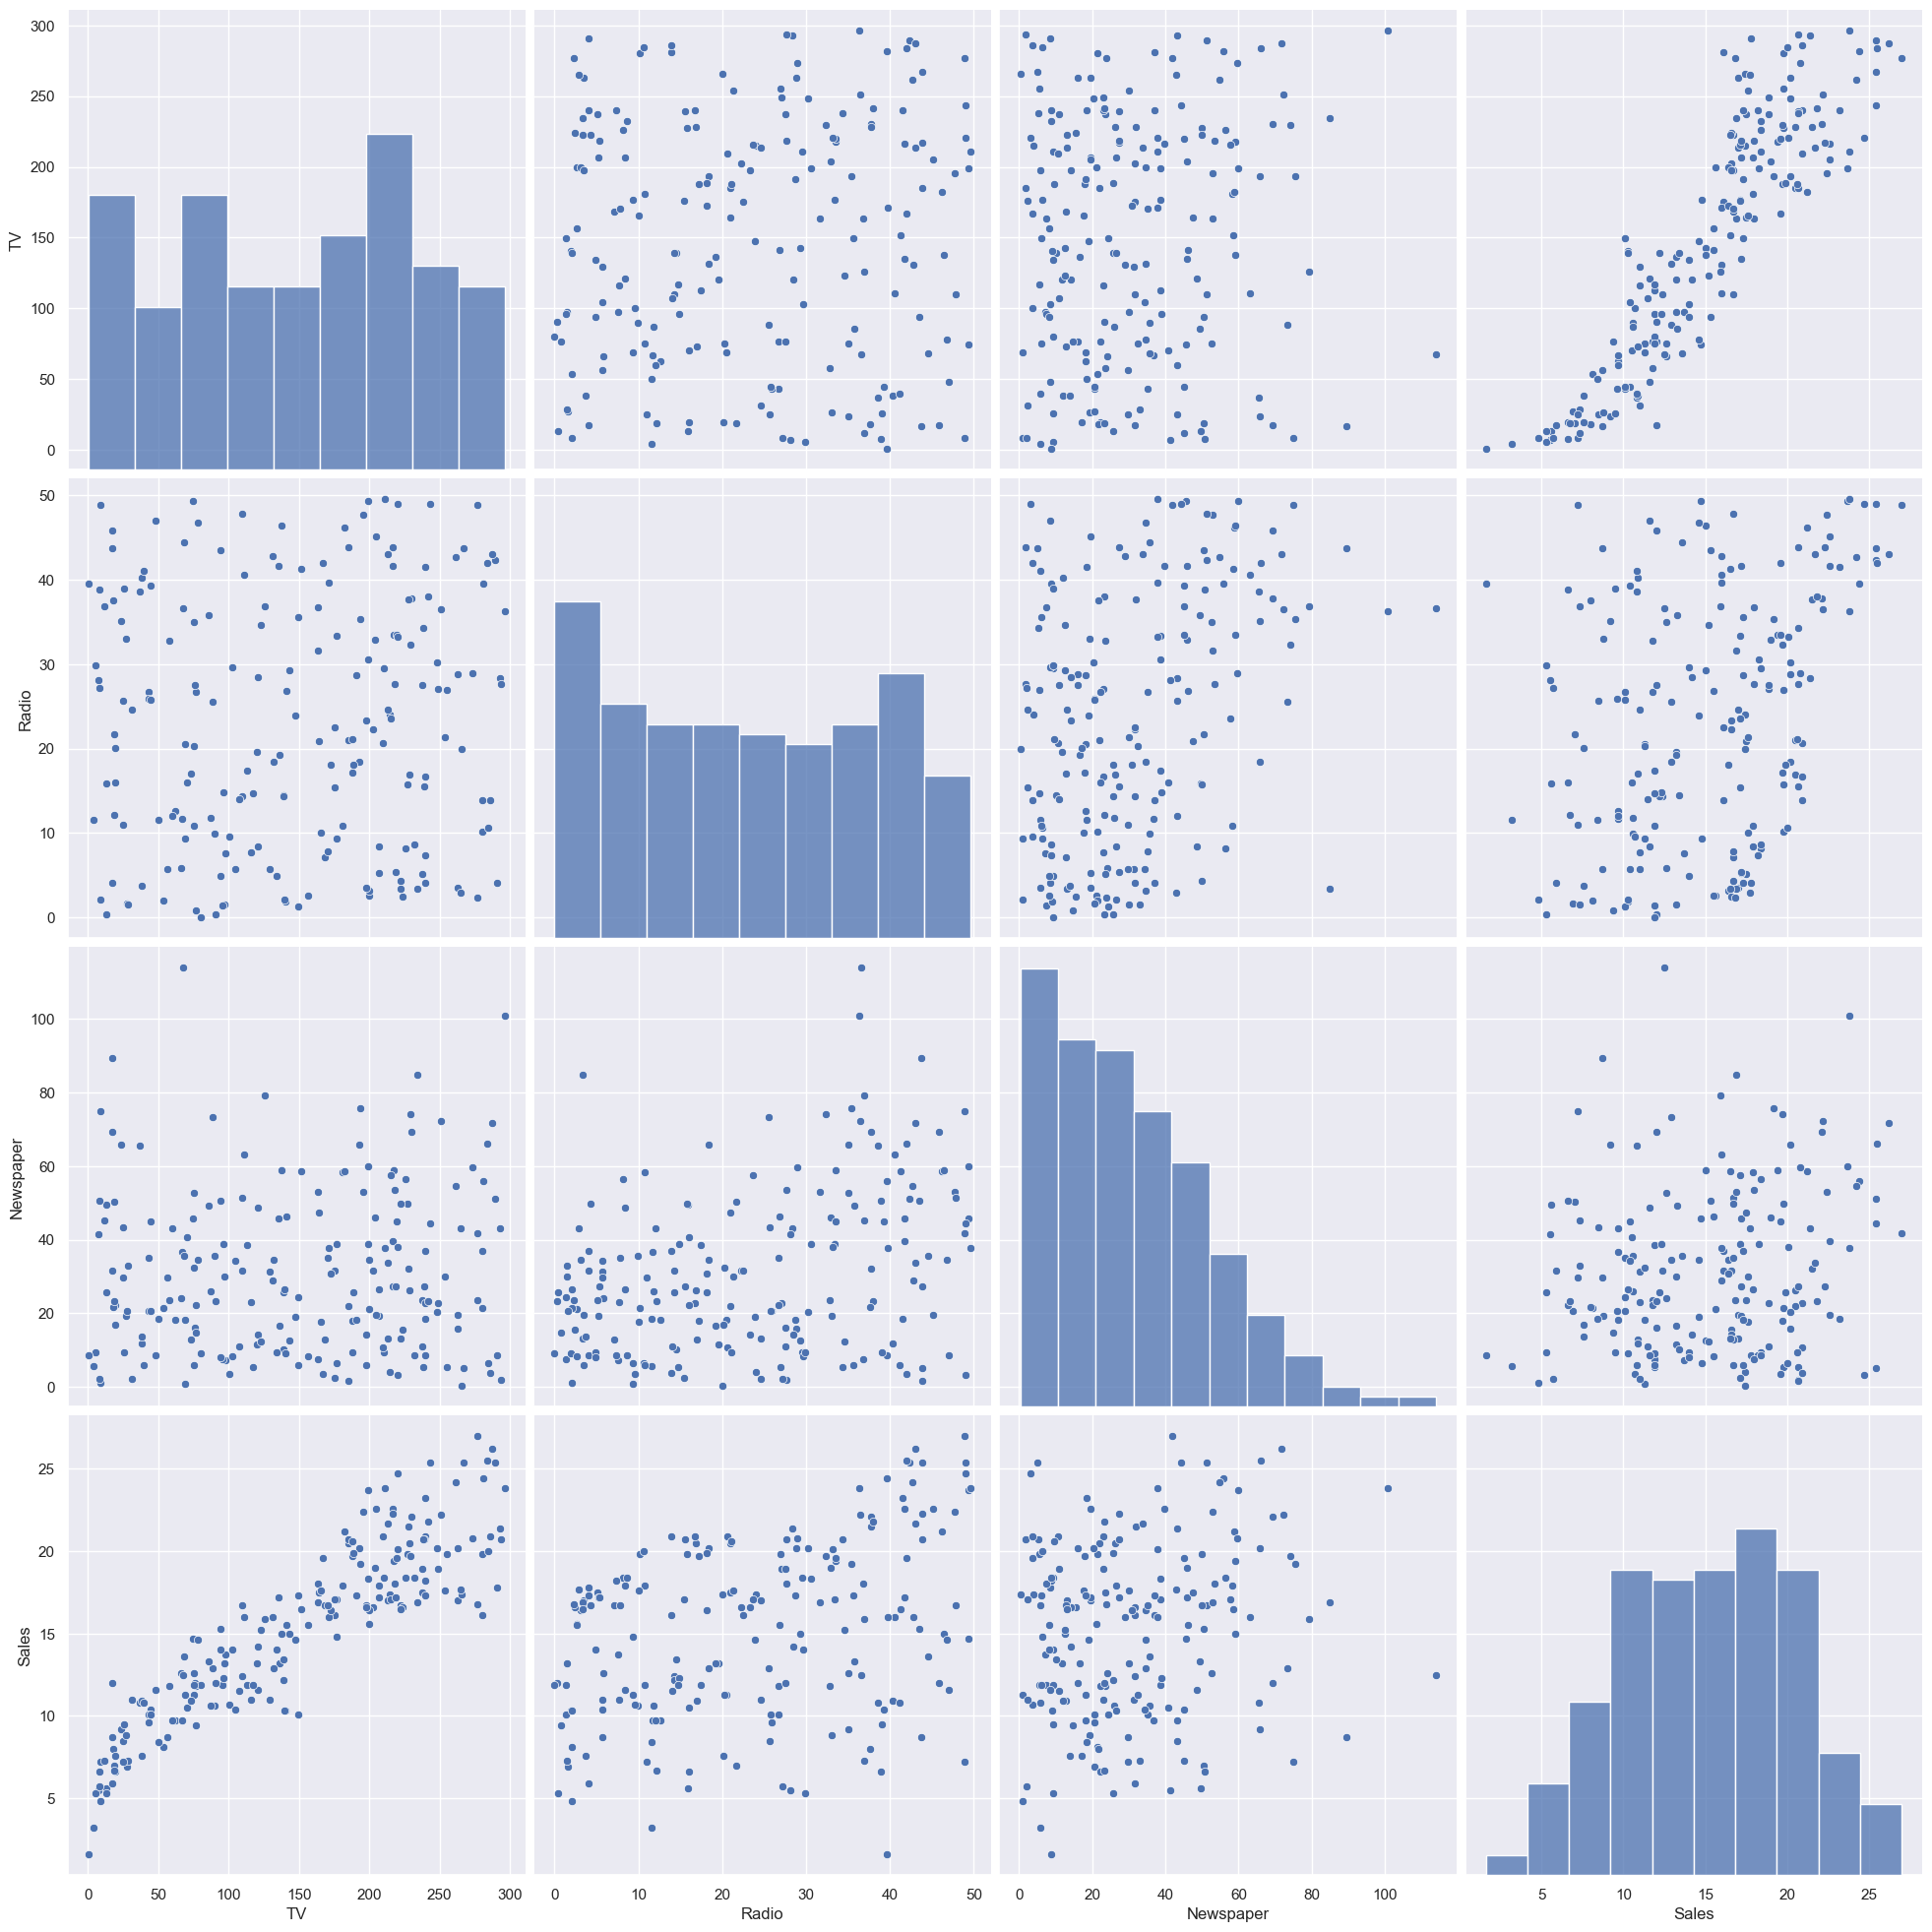

In [122]:
sns.pairplot(df, size = 5, kind = 'scatter')

## Split data into dv and idv

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=101)

## Model building

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [101]:
#linear
linear=LinearRegression()

In [102]:
#DecisionTree
dtree=DecisionTreeRegressor()

In [103]:
#Bagging
bagg=BaggingRegressor()

In [104]:
#Randomforest
rf=RandomForestRegressor()

In [105]:
#Boosting
gdb=GradientBoostingRegressor()
xgb=XGBRegressor()

In [106]:
#K nearest neighbor
knn=KNeighborsRegressor()

In [107]:
#SVM
svm=SVR()

In [108]:
list1=[(linear,'linear',1),(dtree,'decisiontree',2),(bagg,'bagging',3),(rf,'randomforest',4),(gdb,'GradientBoost',5),(xgb,'XGBoost',6),(knn,'KNN',7),(svm,'SVM',8)]

In [109]:
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('===================================================================')
    print(f'Cross validation of {model_name}')
    Train_acc=cross_val_score(model,x_train,y_train,cv=10).mean()
    Test_acc=cross_val_score(model,x_test,y_test,cv=10).mean()
    varience=abs(Train_acc-Test_acc)
    print('Train accuracy:',Train_acc)
    print('Test accuracy:',Test_acc)
    print('varience:',varience)
    if varience>10 :
        print(f'Overfitting {model_name}')

Cross validation of linear
Train accuracy: 0.8917209999642047
Test accuracy: 0.737499755151115
varience: 0.15422124481308974
Cross validation of decisiontree
Train accuracy: 0.8731242177605948
Test accuracy: 0.7013634402205007
varience: 0.1717607775400941
Cross validation of bagging
Train accuracy: 0.9185257609244168
Test accuracy: 0.7857086775887352
varience: 0.13281708333568165
Cross validation of randomforest
Train accuracy: 0.9304403851442382
Test accuracy: 0.8045875642071871
varience: 0.12585282093705108
Cross validation of GradientBoost
Train accuracy: 0.9357810059707827
Test accuracy: 0.8372974285092992
varience: 0.0984835774614835
Cross validation of XGBoost
Train accuracy: 0.9330775069941302
Test accuracy: 0.8617077410719822
varience: 0.07136976592214794
Cross validation of KNN
Train accuracy: 0.8925500952127685
Test accuracy: 0.616338495816378
varience: 0.2762115993963905
Cross validation of SVM
Train accuracy: 0.8483332402036694
Test accuracy: 0.6060695516386586
varience: 0.

## OLS METHOD

In [110]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
reg_model = smf.OLS(endog = y_test, exog=x_test).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              561.3
Date:                Sat, 21 Oct 2023   Prob (F-statistic):                    8.59e-37
Time:                        11:14:06   Log-Likelihood:                         -117.42
No. Observations:                  50   AIC:                                      240.8
Df Residuals:                      47   BIC:                                      246.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0680      0.003     19.638      0.000       0.061       0.075
Radio          0.1407      0.027      5.196      0.000       0.086       0.195
Newspaper      0.0465      0.018      2.639      0.011       0.011       0.082
==============================================================================
Omnibus:                        2.253   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                2.057
Skew:                           0.403   Prob(JB):                        0.357
Kurtosis:                       2.417   Cond. No.                         13.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## REGULARIZATION TECHNIQUE

## LASSO 

In [111]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)
print('Lasso coefficient:',lasso.coef_)
print()
print('y_pred_test_lasso:',lasso.predict(x_test))
print()
print('y_pred_train_lasso:',lasso.predict(x_train))
print()
print('Accuracy of train value:',r2_score(y_train,y_pred_train_lasso))
print()
print('Accuracy of test value:',r2_score(y_test,y_pred_test_lasso))

Lasso coefficient: [ 0.054996    0.10979344 -0.00325905]

y_pred_test_lasso: [13.90290827 21.50134733 12.51350461 15.63902183  8.94597241  7.27079017
 22.07753153 18.91422151 12.41506468 20.1680922  10.99559068 15.86564442
 17.0815645  20.68680726 18.81287858  9.74370518 19.29902399  9.91256075
  8.48328699 21.09386114  7.74921548 18.1765981  24.98091349 23.40021471
  9.33271956 15.73564716 23.70208787  8.97466735 14.66776257 10.27944742
  9.46773261 20.13906785 12.41349129  6.82986344 17.79511756  9.93237948
 10.52665406 10.21206247  9.06737161 13.39063627 11.89548637 12.33566722
 11.30863071  7.77203578 11.58035215 10.5166978   8.06901682 18.58705083
 15.45856715 20.33081168]

y_pred_train_lasso: [11.13507065 16.73474827 20.96889936 12.56174572 15.72442176  6.00036048
 23.9909401  11.18579967 21.32167887 16.5173418  16.95115666 24.82381777
  8.9005456  19.44327018 17.06077132 22.09017757 17.13377939 13.84643273
 15.22610801 16.33479817 17.51334195  9.26985717 21.76277652  8.76114484


## RIDGE

In [112]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.3)
ridge.fit(x_train,y_train)
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)
print('Ridge coefficient:',ridge.coef_)
print()
print('y_pred_test_ridge:',ridge.predict(x_test))
print()
print('y_pred_train_ridge:',ridge.predict(x_train))
print()
print('Accuracy of train value:',r2_score(y_train,y_pred_train_ridge))
print()
print('Accuracy of test value:',r2_score(y_test,y_pred_test_ridge))

Ridge coefficient: [[ 0.05501359  0.11040204 -0.00361249]]

y_pred_test_ridge: [[13.91194627]
 [21.51407876]
 [12.50624902]
 [15.64568894]
 [ 8.9545318 ]
 [ 7.26679879]
 [22.08787197]
 [18.92212825]
 [12.40931958]
 [20.17259256]
 [11.01039099]
 [15.87107069]
 [17.07672742]
 [20.69297594]
 [18.80492192]
 [ 9.74672388]
 [19.29269821]
 [ 9.90629229]
 [ 8.47853448]
 [21.10331735]
 [ 7.74959605]
 [18.18425951]
 [24.99458247]
 [23.40527669]
 [ 9.33308662]
 [15.72263109]
 [23.71728585]
 [ 8.96159732]
 [14.66435257]
 [10.2770028 ]
 [ 9.46003299]
 [20.14119373]
 [12.40936038]
 [ 6.81605337]
 [17.79869167]
 [ 9.91821064]
 [10.52002689]
 [10.20765028]
 [ 9.06787069]
 [13.38585131]
 [11.87247343]
 [12.32380931]
 [11.29939298]
 [ 7.76157131]
 [11.58387538]
 [10.51773484]
 [ 8.0777979 ]
 [18.57683833]
 [15.44149128]
 [20.33839357]]

y_pred_train_ridge: [[11.13764268]
 [16.72798081]
 [20.96622308]
 [12.5646566 ]
 [15.71583743]
 [ 5.99928917]
 [24.01433574]
 [11.20326919]
 [21.3322283 ]
 [16.51679357]

In [113]:
list2=[(linear,'linear',1),(dtree,'decisiontree',2),(bagg,'bagging',3),(rf,'randomforest',4),(gdb,'GradientBoost',5),(xgb,'XGBoost',6),(knn,'KNN',7),(svm,'SVM',8),(lasso,'lasso',9),(ridge,'ridge',10)]

In [114]:
acc_list=[]
for model,model_name,i in list2:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    test_acc=r2_score(y_test,y_pred_test)
    acc_list.append(test_acc)

In [115]:
model=['linear','decisiontree','bagging','randomforest','GradientBoost','XGBoost','KNN','SVM','Lasso','Ridge']

In [116]:
metrics_df=pd.DataFrame({'model_name':model,'Accuracy':acc_list})

In [117]:
metrics_df

,model_name,Accuracy
0,linear,0.894901
1,decisiontree,0.925951
2,bagging,0.957532
3,randomforest,0.950319
4,GradientBoost,0.940238
5,XGBoost,0.942672
6,KNN,0.932799
7,SVM,0.876635
8,Lasso,0.895135
9,Ridge,0.894901


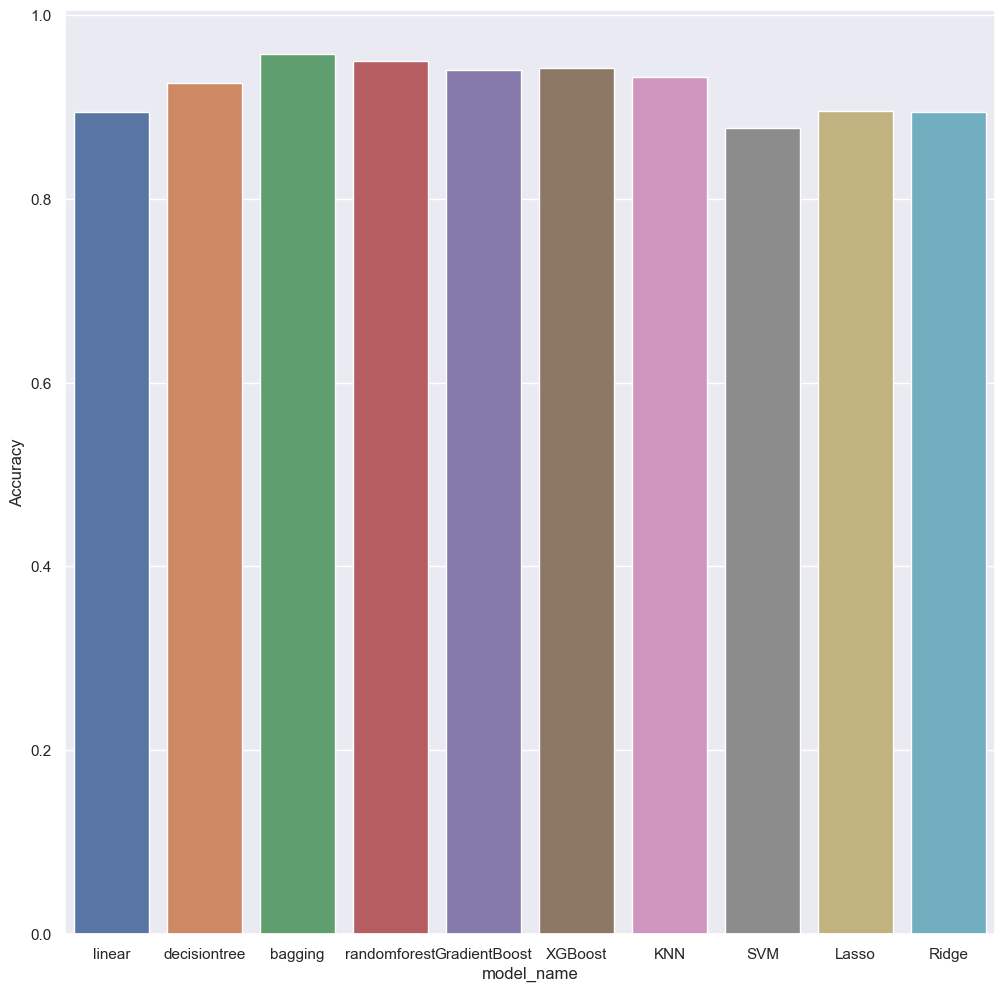

In [118]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Accuracy',data=metrics_df)
plt.show()

## 🎯Summary:
### We can observe that all models predicted and gave best accuracy among all GDB,XGB,LASSO,RIDGE PERFORMED BEST WITH LITTLE VARIENCE
### BEST MODEL:LASSO,RIDGE